# Import module

In [3]:
# import module
import numpy as np
from numpy import random as rd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

# Set up

In [4]:
# Parameters
fname = '/Users/shohei/Desktop/Shohei/Fresnel/Detector/Paper/Discussion'
h = 6.626070040*10**(-27)   # erg*s
c = 2.99792458*10**10       # cm/s
k = 1.38064852*10**(-16)    # erg/K
t_exp = 60
times = 60
T_star = np.load('{}/Data/temperature.npy'.format(fname)).astype(int)
R_star = np.load('{}/Data/radius.npy'.format(fname))*6.95508*10**10
R_planet = 6.378137*10**8
p = R_planet/R_star
P = np.load('{}/Data/period.npy'.format(fname))
a = np.load('{}/Data/semi.npy'.format(fname))
P_tra = P*R_star/np.pi/a
t_one = (P_tra*3/t_exp).astype(np.int64)
t_one[3]+=1
t0 = [np.linspace(1, t_one[TT], t_one[TT]) for TT in range(len(T_star))]
z = [np.load('{}/Data/parameter_{}.npy'.format(fname, temp)) for temp in T_star]
n_pix = 1800
lamb = np.load('{}/Data/lamb.npy'.format(fname))
tra = [np.load('{}/Data/primary_{}.npy'.format(fname, temp))/n_pix for temp in T_star]
zodi = np.load('{}/Data/zodi.npy'.format(fname))/n_pix

# Level of signal

In [5]:
# 系統誤差とランダム誤差を示す図を作成
class Level(object):
    
    def __init__(self):
        pass
    
    def ZODI(self, i, T, sub='both'):
        """
        field_stop = 1(black), 2(blue), 4(red) [arcsec]
        """
        std_markersize = 2
        rand_markersize = 4
        color = ['k', 'b', 'r']
        ax = fig.add_subplot(i)
        if sub=='both':
            [ax.plot(lamb, abs(zodi_both_eva_std[j, T]), 'ro', c=color[j], markersize=std_markersize) for j in range(3)]
            #[ax.plot(lamb, abs(zodi_both_rand[j, T]), 'x', c=color[j], markersize=rand_markersize) for j in range(3)]
        else:
            [ax.plot(lamb, abs(zodi_ref_eva_std[j, T]), 'ro', c=color[j], markersize=std_markersize) for j in range(3)]
            #[ax.plot(lamb, abs(zodi_ref_rand[j, T]), 'x', c=color[j], markersize=rand_markersize) for j in range(3)]
        ax.set_xlabel('Wavelength [μm]')
        ax.set_ylabel('ppm')
        ax.set_xlim(lamb[0], lamb[-1])
        ax.annotate('{}K'.format(T_star[T]), xy=(0.03, 0.85), xycoords='axes fraction', fontsize=28, ha='left', va='bottom')
        
    def dark_current(self, i, T, sub='both'):
        """
        dark_current = 12(black), 30(green), 60(blue), 300(red) [electron/read]
        """
        std_markersize = 2
        rand_markersize = 4
        color = ['k', 'g', 'b', 'r']
        ax = fig.add_subplot(i)
        if sub=='both':
            [ax.plot(lamb, abs(dark_both_eva_std[j, T]), 'ro', c=color[j], markersize=std_markersize) for j in range(4)]
            #[ax.plot(lamb, abs(dark_both_rand[j, T]), 'x', c=color[j], markersize=rand_markersize) for j in range(4)]
        else:
            [ax.plot(lamb, abs(dark_ref_eva_std[j, T]), 'ro', c=color[j], markersize=std_markersize) for j in range(4)]
            #[ax.plot(lamb, abs(dark_ref_rand[j, T]), 'x', c=color[j], markersize=rand_markersize) for j in range(4)]
        ax.set_xlabel('Wavelength [μm]')
        ax.set_ylabel('ppm')
        ax.set_xlim(lamb[0], lamb[-1])
        ax.annotate('{}K'.format(T_star[T]), xy=(0.03, 0.85), xycoords='axes fraction', fontsize=28, ha='left', va='bottom')

## Level of zodiacal light

In [19]:
# 各評価値を取得
case_zodi = [1, 2, 3]
zodi_both_eva = np.array([np.load('{}/SN/ZODI/Revise/sub_evaluation_both_zodi_{}.npy'.format(fname, case)) for case in case_zodi])
zodi_both_sig = np.array([np.load('{}/SN/ZODI/Revise/sub_sigma_both_zodi_{}.npy'.format(fname, case)) for case in case_zodi])
zodi_ref_eva = np.array([np.load('{}/SN/ZODI/Revise/sub_evaluation_back_zodi_{}.npy'.format(fname, case)) for case in case_zodi])
zodi_ref_sig = np.array([np.load('{}/SN/ZODI/Revise/sub_sigma_back_zodi_{}.npy'.format(fname, case)) for case in case_zodi])

In [20]:
# 系統誤差とランダム誤差をそれぞれの平均値と分散値でガウス分布する値を作成
def Gauss(eva, sig):
    eva_mean = np.mean(eva, axis=1)
    eva_std = np.std(eva, axis=1)
    systematic = rd.normal(eva_mean, eva_std)
    sig_mean = np.mean(sig, axis=1)
    sig_std = np.std(sig, axis=1)
    random = rd.normal(sig_mean, sig_std)
    return systematic, random

zodi_both_sys, zodi_both_rand = Gauss(zodi_both_eva, zodi_both_sig)
zodi_ref_sys, zodi_ref_rand = Gauss(zodi_ref_eva, zodi_ref_sig)

In [21]:
# 各評価値の標準偏差を取得
zodi_both_eva_std = np.std(zodi_both_eva, axis=1)
zodi_ref_eva_std = np.std(zodi_ref_eva, axis=1)

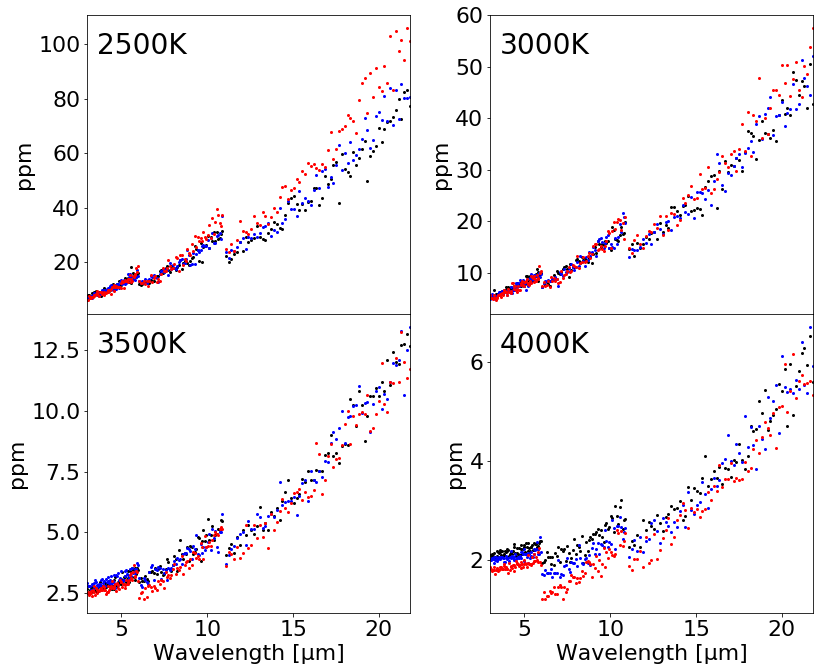

In [22]:
# both
fig = plt.figure(figsize=(13, 11))
plt.rcParams['font.size'] = 22
Level().ZODI(221, 0)
Level().ZODI(222, 1)
Level().ZODI(223, 2)
Level().ZODI(224, 3)
plt.subplots_adjust(hspace=0, wspace=0.25)
#plt.savefig('/Users/shohei/Desktop/Shohei/Fresnel/Detector/Paper/Manuscript/sn_zodi.pdf')
plt.show()

## Level of dark current

In [41]:
# 各評価値を取得
level_dark = [12, 30, 60, 300]
dark_both_eva = np.array([np.load('{}/SN/DarkCurrent/Revise/sub_evaluation_both_dark_{}.npy'.format(fname, level)) for level in level_dark])
dark_both_sig = np.array([np.load('{}/SN/DarkCurrent/Revise/sub_sigma_both_dark_{}.npy'.format(fname, level)) for level in level_dark])
dark_ref_eva = np.array([np.load('{}/SN/DarkCurrent/Revise/sub_evaluation_ref_dark_{}.npy'.format(fname, level)) for level in level_dark])
dark_ref_sig = np.array([np.load('{}/SN/DarkCurrent/Revise/sub_sigma_ref_dark_{}.npy'.format(fname, level)) for level in level_dark])

In [9]:
# 系統誤差とランダム誤差をそれぞれの平均値と分散値でガウス分布する値を作成
def Gauss(eva, sig):
    eva_mean = np.mean(eva, axis=1)
    eva_std = np.std(eva, axis=1)
    systematic = rd.normal(eva_mean, eva_std)
    sig_mean = np.mean(sig, axis=1)
    sig_std = np.std(sig, axis=1)
    random = rd.normal(sig_mean, sig_std)
    return systematic, random

dark_both_sys, dark_both_rand = Gauss(dark_both_eva, dark_both_sig)
dark_ref_sys, dark_ref_rand = Gauss(dark_ref_eva, dark_ref_sig)

In [10]:
# 各評価値の標準偏差を取得
dark_both_eva_std = np.std(dark_both_eva, axis=1)
dark_ref_eva_std = np.std(dark_ref_eva, axis=1)

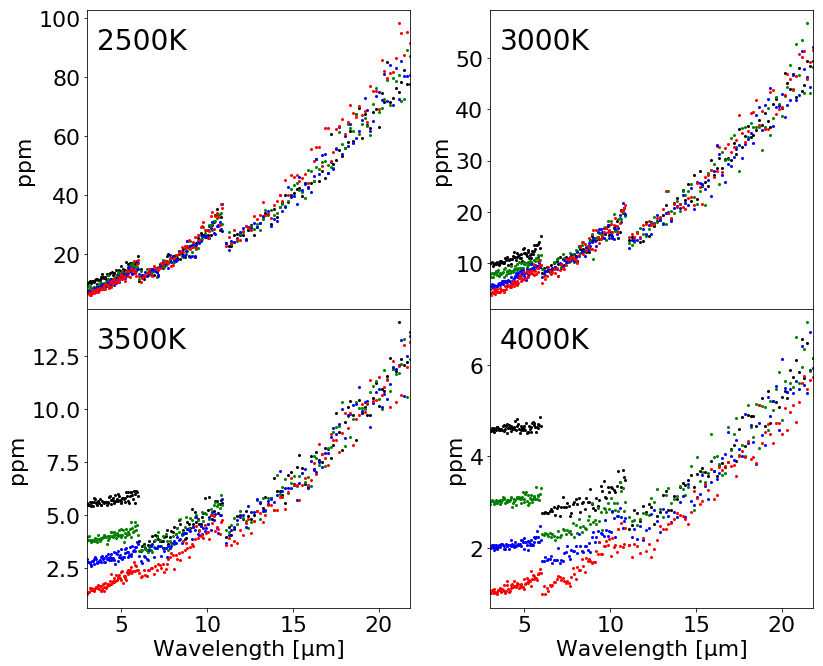

In [23]:
# both
fig = plt.figure(figsize=(13, 11))
plt.rcParams['font.size'] = 22
Level().dark_current(221, 0)
Level().dark_current(222, 1)
Level().dark_current(223, 2)
Level().dark_current(224, 3)
plt.subplots_adjust(hspace=0, wspace=0.25)
#plt.savefig('/Users/shohei/Desktop/Shohei/Fresnel/Detector/Paper/Manuscript/sn_dark.pdf')
plt.show()

# Time-variation of signal

In [12]:
# 系統誤差を示す図を作成（全波長範囲）
class AllRange(object):
    
    def __init__(self, kind='ZODI', sub='both'):
        self.std_ms = 2
        self.rand_ms = 4
        self.color = ['k', 'g', 'b', 'c', 'r']
        if kind=='ZODI':
            if sub=='both':
                self.data = zodi_both_eva_std
            else:
                self.data = zodi_back_eva_std
        else:
            if sub=='both':
                self.data = dark_both_eva_std
            else:
                self.data = dark_ref_eva_std
    
    def plot(self, i, T):
        """
        std = 0(black), 100(green), 200(blue), 300(cyan), 1000(red) [ppm]
        """
        ax = fig.add_subplot(i)
        [ax.plot(lamb, self.data[j, T], 'ro', c=self.color[j], markersize=self.std_ms) for j in range(len(self.data))]
        ax.set_xlabel('Wavelength [μm]')
        ax.set_ylabel('ppm')
        ax.set_xlim(lamb[0], lamb[-1])
        ax.annotate('{}K'.format(T_star[T]), xy=(0.03, 0.85), xycoords='axes fraction', fontsize=28, ha='left', va='bottom')

In [15]:
# 系統誤差を示す図を作成（ある波長帯）
class PartRange(object):
    
    def __init__(self, kind='ZODI', sub='sub'):
        self.ms = 5
        self.color = ['g', 'b', 'r']
        self.kind = kind
        self.sub = sub
        if self.kind=='ZODI':
            self.name = 'zodiacal light'
            if self.sub=='both':
                self.data = zodi_both_eva_std
            else:
                self.data = zodi_back_eva_std
        else:
            self.name = 'dark current'
            if self.sub=='both':
                self.data = dark_both_eva_std
            else:
                self.data = dark_ref_eva_std
                
    def select(self, T, lamb_tar):
        l_tar = np.where(np.abs(lamb-lamb_tar)==np.abs(lamb-lamb_tar).min())[0][0]
        return self.data[:, T, l_tar]
        
    def plot(self, i, T):
        """
        std = 0(black), 100(blue), 1000(red) [ppm]
        wavelength = 5(green), 10(blue), 15(red) [µm]
        """
        std = [0, 100, 200, 300, 1000]
        wavelength = [5, 10, 15]
        data = [PartRange(kind=self.kind, sub=self.sub).select(T, lamb_tar) for lamb_tar in wavelength]
        ax = fig.add_subplot(i)
        [ax.plot(std, data[j], 'ro', c=self.color[j], markersize=self.ms) for j in range(len(wavelength))]
        #ax.set_xscale('log')
        ax.set_xlabel('Standard deviation of \n time-variation of \n {} [ppm]'.format(self.name))
        ax.set_ylabel('ppm')
        ax.annotate('{}K'.format(T_star[T]), xy=(0.03, 0.85), xycoords='axes fraction', fontsize=28, ha='left', va='bottom')            

## Time-variation of zodiacal light

In [8]:
# 各評価値を取得
zodi_std = [0, 100, 200, 300, 1000]
zodi_both_eva = np.array([np.load('{}/Variation/ZODI/Revise/sub_evaluation_both_variation_zodi_{}.npy'.format(fname, std)) for std in zodi_std])
zodi_both_sig = np.array([np.load('{}/Variation/ZODI/Revise/sub_sigma_both_variation_zodi_{}.npy'.format(fname, std)) for std in zodi_std])
zodi_back_eva = np.array([np.load('{}/Variation/ZODI/Revise/sub_evaluation_back_variation_zodi_{}.npy'.format(fname, std)) for std in zodi_std])
zodi_back_sig = np.array([np.load('{}/Variation/ZODI/Revise/sub_sigma_back_variation_zodi_{}.npy'.format(fname, std)) for std in zodi_std])

In [9]:
# 系統誤差とランダム誤差をそれぞれの平均値と分散値でガウス分布する値を作成
def Gauss(eva, sig):
    eva_mean = np.mean(eva, axis=1)
    eva_std = np.std(eva, axis=1)
    systematic = rd.normal(eva_mean, eva_std)
    sig_mean = np.mean(sig, axis=1)
    sig_std = np.std(sig, axis=1)
    random = rd.normal(sig_mean, sig_std)
    return systematic, random

zodi_both_sys, zodi_both_rand = Gauss(zodi_both_eva, zodi_both_sig)
zodi_back_sys, zodi_back_rand = Gauss(zodi_back_eva, zodi_back_sig)

In [10]:
# 各評価値の標準偏差を取得
zodi_both_eva_std = np.std(zodi_both_eva, axis=1)
zodi_back_eva_std = np.std(zodi_back_eva, axis=1)

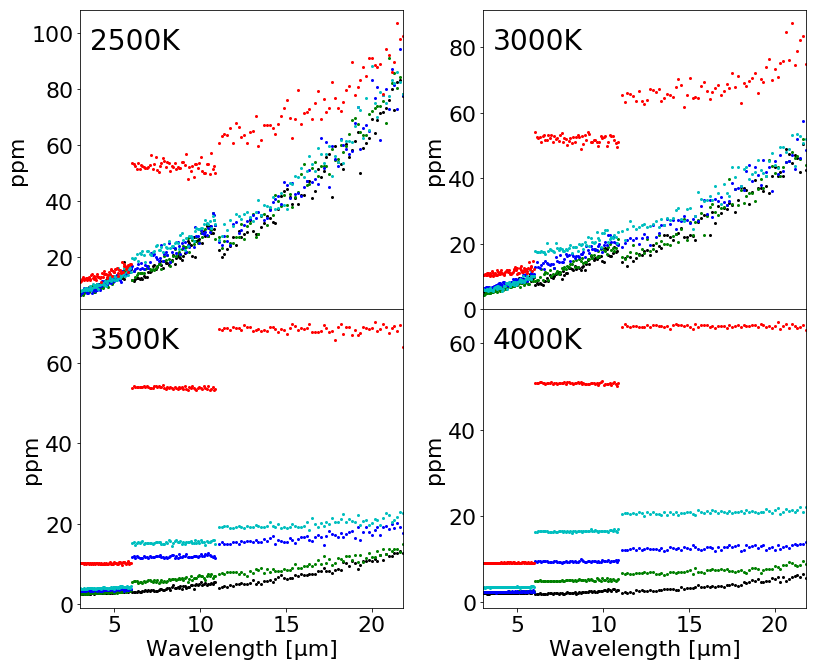

In [23]:
# AllRange(both)
fig = plt.figure(figsize=(13, 11))
plt.rcParams['font.size'] = 22
AllRange().plot(221, 0)
AllRange().plot(222, 1)
AllRange().plot(223, 2)
AllRange().plot(224, 3)
plt.subplots_adjust(hspace=0, wspace=0.25)
plt.savefig('/Users/shohei/Desktop/Shohei/Fresnel/Detector/Paper/Manuscript/Revise/variation_zodi.pdf')
plt.show()

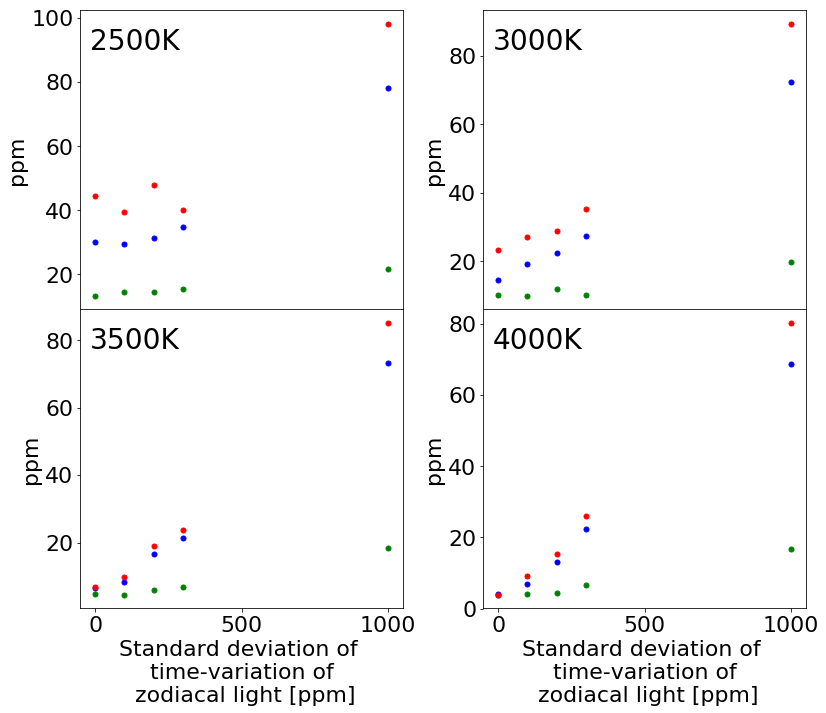

In [16]:
# PartRange(both)
fig = plt.figure(figsize=(13, 11))
plt.rcParams['font.size'] = 22
PartRange().plot(221, 0)
plt.xticks([])
PartRange().plot(222, 1)
plt.xticks([])
PartRange().plot(223, 2)
PartRange().plot(224, 3)
plt.subplots_adjust(hspace=0, wspace=0.25)
#plt.savefig('/Users/shohei/Desktop/Shohei/Fresnel/Detector/Paper/Manuscript/Revise/variation_zodi_2.pdf')
plt.show()

## Time-variation of dark current

In [17]:
# 各評価値を取得
dark_std = [0, 100, 200, 300, 1000]
dark_both_eva = np.array([np.load('{}/Variation/DarkCurrent/Revise/sub_evaluation_both_variation_dark_{}.npy'.format(fname, std)) for std in dark_std])
dark_both_sig = np.array([np.load('{}/Variation/DarkCurrent/Revise/sub_sigma_both_variation_dark_{}.npy'.format(fname, std)) for std in dark_std])
dark_ref_eva = np.array([np.load('{}/Variation/DarkCurrent/Revise/sub_evaluation_ref_variation_dark_{}.npy'.format(fname, std)) for std in dark_std])
dark_ref_sig = np.array([np.load('{}/Variation/DarkCurrent/Revise/sub_sigma_ref_variation_dark_{}.npy'.format(fname, std)) for std in dark_std])

In [18]:
# 系統誤差とランダム誤差をそれぞれの平均値と分散値でガウス分布する値を作成
def Gauss(eva, sig):
    eva_mean = np.mean(eva, axis=1)
    eva_std = np.std(eva, axis=1)
    systematic = rd.normal(eva_mean, eva_std)
    sig_mean = np.mean(sig, axis=1)
    sig_std = np.std(sig, axis=1)
    random = rd.normal(sig_mean, sig_std)
    return systematic, random

dark_both_sys, dark_both_rand = Gauss(dark_both_eva, dark_both_sig)
dark_ref_sys, dark_ref_rand = Gauss(dark_ref_eva, dark_ref_sig)

In [19]:
# 各評価値の標準偏差を取得
dark_both_eva_std = np.std(dark_both_eva, axis=1)
dark_ref_eva_std = np.std(dark_ref_eva, axis=1)

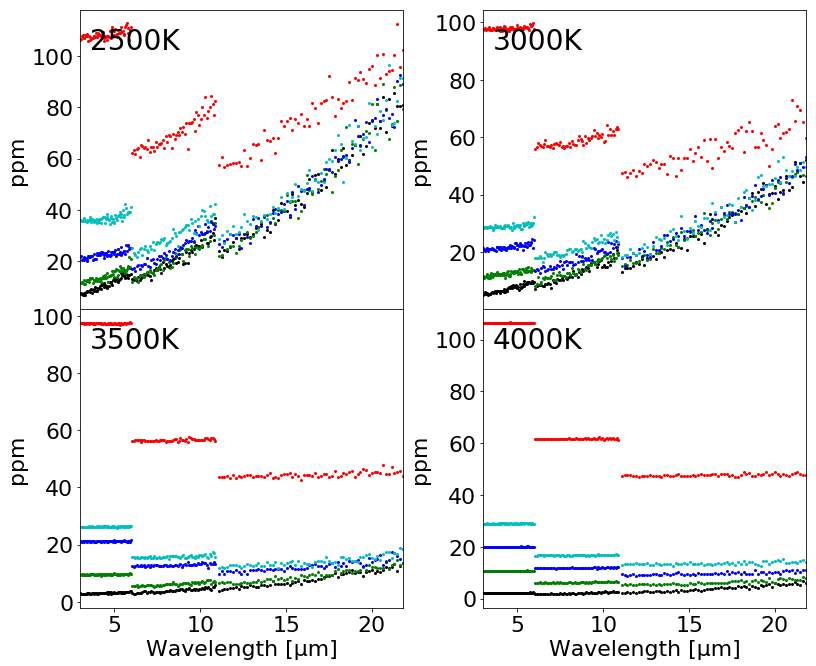

In [22]:
# AllRange(both)
fig = plt.figure(figsize=(13, 11))
plt.rcParams['font.size'] = 22
AllRange(kind='dark').plot(221, 0)
AllRange(kind='dark').plot(222, 1)
AllRange(kind='dark').plot(223, 2)
AllRange(kind='dark').plot(224, 3)
plt.subplots_adjust(hspace=0, wspace=0.25)
plt.savefig('/Users/shohei/Desktop/Shohei/Fresnel/Detector/Paper/Manuscript/Revise/variation_dark.pdf')
plt.show()

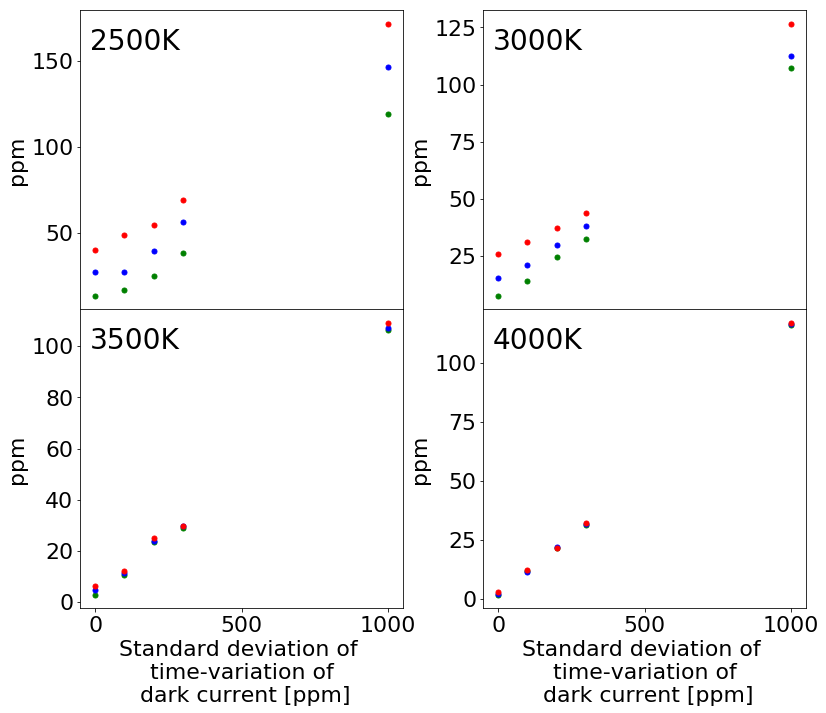

In [21]:
# PartRange(both)
fig = plt.figure(figsize=(13, 11))
plt.rcParams['font.size'] = 22
PartRange(kind='dark').plot(221, 0)
plt.xticks([])
PartRange(kind='dark').plot(222, 1)
plt.xticks([])
PartRange(kind='dark').plot(223, 2)
PartRange(kind='dark').plot(224, 3)
plt.subplots_adjust(hspace=0, wspace=0.25)
#plt.savefig('/Users/shohei/Desktop/Shohei/Fresnel/Detector/Paper/Manuscript/Revise/variation_dark.pdf')
plt.show()

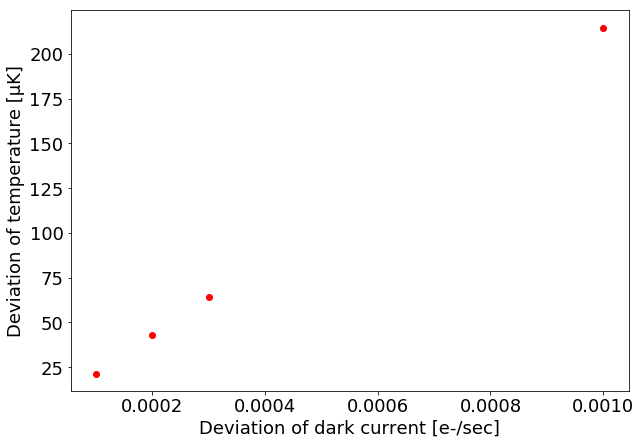

Tc: 7.763975155279502 [K], dT: 21.466134971290565 [µk] (100ppm)


In [177]:
# 暗電流の変動に対する温度変動（Si:As）
Px = [4, -1]
Py = [96, 137]
a = (Py[1]-Py[0])/(Px[1]-Px[0])
b = ((Py[0]-a*Px[0])+(Py[1]-a*Px[1]))/2
dQ = np.array([100, 200, 300, 1000])*10**(-6)
Qc = 1.0
Q1 = Qc-dQ/2
Q2 = Qc+dQ/2
dlnQ = np.log10(Q2/Q1)
Tc = 1000/b
d1000_T = a*dlnQ
dT = 2000/d1000_T*(1-np.sqrt(1+(d1000_T*Tc/1000)**2))

plt.figure(figsize=(10, 7))
plt.rcParams['font.size'] = 18
plt.plot(dQ, dT*10**6, 'ro')
plt.xlabel('Deviation of dark current [e-/sec]')
plt.ylabel('Deviation of temperature [μK]')
#plt.xscale('log')
plt.show()

print('Tc: {} [K], dT: {} [µk] (100ppm)'.format(Tc, dT[0]*10**6))

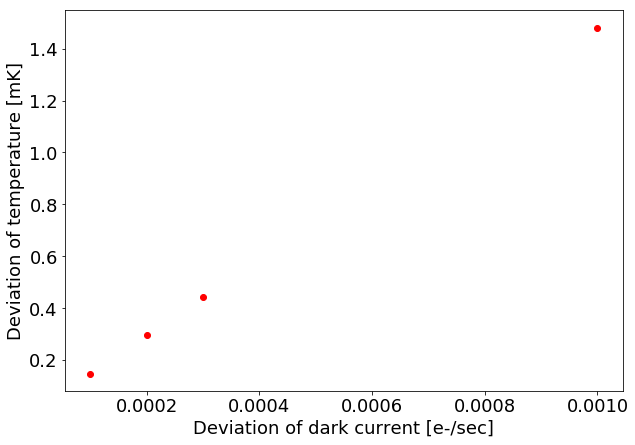

Tc: 38.85003885003885 [K], dT: 0.1481390005094433 [mk] (100ppm)


In [175]:
# 暗電流の変動に対する温度変動（MCT）
Px = [4, -1]
Py = [0.0167, 0.028]
a = (Py[1]-Py[0])/(Px[1]-Px[0])
b = ((Py[0]-a*Px[0])+(Py[1]-a*Px[1]))/2
dQ = np.array([100, 200, 300, 1000])*10**(-6)
Qc = 1.0
Q1 = Qc-dQ/2
Q2 = Qc+dQ/2
dlnQ = np.log10(Q2/Q1)
Tc = 1/b
d1_T = a*dlnQ
dT = 2/d1_T*(1-np.sqrt(1+(d1_T*Tc)**2))

plt.figure(figsize=(10, 7))
plt.rcParams['font.size'] = 18
plt.plot(dQ, dT*10**3, 'ro')
plt.xlabel('Deviation of dark current [e-/sec]')
plt.ylabel('Deviation of temperature [mK]')
#plt.xscale('log')
plt.show()

print('Tc: {} [K], dT: {} [mk] (100ppm)'.format(Tc, dT[0]*10**3))

In [161]:
a

-0.0022600000000000003

In [163]:
a

-8.2

# Unconsidered factors

## Offset estimation error

In [86]:
# 各評価値を取得 
offset_error = [0, 5, 10, 20, 50]
offset_both_eva = np.array([np.load('{}/OffsetError/Revise/Result/sub_evaluation_both_offset_{}.npy'.format(fname, offset)) for offset in offset_error])
offset_both_sig = np.array([np.load('{}/OffsetError/Revise/Result/sub_sigma_both_offset_{}.npy'.format(fname, offset)) for offset in offset_error])
offset_back_eva = np.array([np.load('{}/OffsetError/Revise/Result/sub_evaluation_back_offset_{}.npy'.format(fname, offset)) for offset in offset_error])
offset_back_sig = np.array([np.load('{}/OffsetError/Revise/Result/sub_sigma_back_offset_{}.npy'.format(fname, offset)) for offset in offset_error])
offset_ref_eva = np.array([np.load('{}/OffsetError/Revise/Result/sub_evaluation_ref_offset_{}.npy'.format(fname, offset)) for offset in offset_error])
offset_ref_sig = np.array([np.load('{}/OffsetError/Revise/Result/sub_sigma_ref_offset_{}.npy'.format(fname, offset)) for offset in offset_error])

In [87]:
# 系統誤差とランダム誤差をそれぞれの平均値と分散値でガウス分布する値を作成
def Gauss(eva, sig):
    eva_mean = np.mean(eva, axis=1)
    eva_std = np.std(eva, axis=1)
    systematic = rd.normal(eva_mean, eva_std)
    sig_mean = np.mean(sig, axis=1)
    sig_std = np.std(sig, axis=1)
    random = rd.normal(sig_mean, sig_std)
    return systematic, random

offset_both_sys, offset_both_rand = Gauss(offset_both_eva, offset_both_sig)
offset_back_sys, offset_back_rand = Gauss(offset_back_eva, offset_back_sig)
offset_ref_sys, offset_ref_rand = Gauss(offset_ref_eva, offset_ref_sig)

In [88]:
# 各評価値の標準偏差を取得
offset_both_eva_std = np.std(offset_both_eva, axis=1)
offset_back_eva_std = np.std(offset_back_eva, axis=1)
offset_ref_eva_std = np.std(offset_ref_eva, axis=1)

In [99]:
# 系統誤差とランダム誤差を示す図を作成
def offset_error(i, T, offset):
    """
    offset_error = 0(cyan), 5(blue), 10(green), 20(red), 50(black) [%]
    """
    std_markersize = 2
    rand_markersize = 4
    color = ['c', 'b', 'g', 'r', 'k']
    ax = fig.add_subplot(i)
    [ax.plot(lamb, abs(offset_both_eva_std[j, T]), 'ro', c=color[j], markersize=std_markersize) for j in offset]
    #[ax.plot(lamb, abs(offset_both_rand[j, T]), 'x', c=color[j], markersize=rand_markersize) for j in offset]
    ax.set_xlabel('Wavelength [μm]')
    ax.set_ylabel('ppm')
    ax.set_xlim(lamb[0], lamb[-1])
    ax.annotate('{}K'.format(T_star[T]), xy=(0.03, 0.85), xycoords='axes fraction', fontsize=28, ha='left', va='bottom')

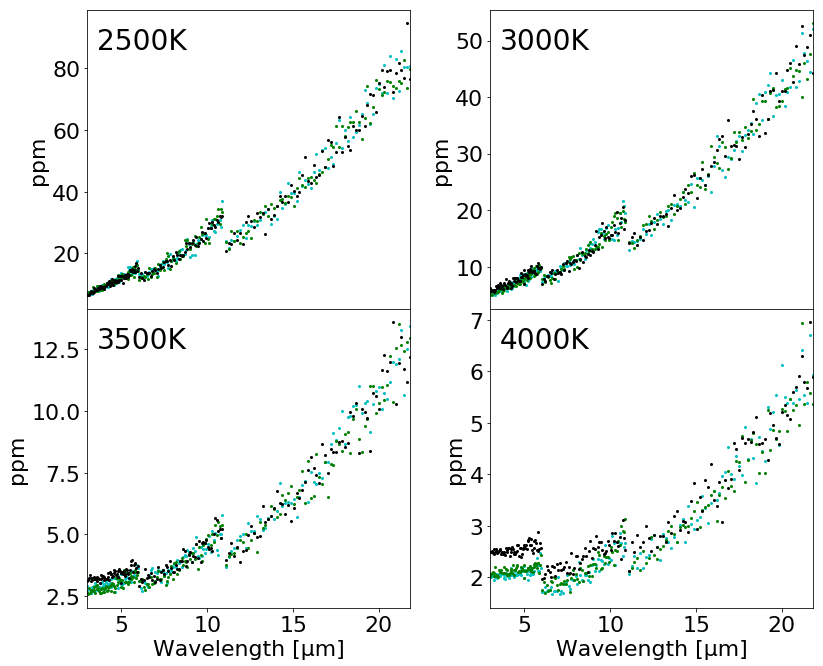

In [101]:
# R=100
offset = [0, 2, 4]
fig = plt.figure(figsize=(13, 11))
plt.rcParams['font.size']=22
offset_error(221, 0, offset)
offset_error(222, 1, offset)
offset_error(223, 2, offset)
offset_error(224, 3, offset)
plt.subplots_adjust(hspace=0, wspace=0.25)
plt.savefig('/Users/shohei/Desktop/Shohei/Fresnel/Detector/Paper/Manuscript/offset_error.pdf')
plt.show()

## Trapping effect

In [102]:
# character

# MIPS
S = np.pi*(85/2)**2         # cm^2
A = 0.1
λ = 24*10**(-4)             # cm
dλ = (26.1-20.8)*10**(-4)   # cm
num_pix = 4

# HD209458
ds = 47*3.086*10**18        # cm
Ts = 6092                   # K
Rs = 1.203*6.95508*10**10   # cm
Ss = np.pi*Rs**2

# variation rate
t = 10*60*60                # elapsed time (sec)
alpha = 0.02                # variation rate

In [128]:
# calculation for tau
def photon_number(λ):
    I = (2*h*c**2)/((λ**5)*(np.exp((h*c)/(λ*k*Ts))-1))
    E = (h*c)/λ
    F = I/E*t*S*Ss/ds**2*dλ*A/num_pix
    return F

full = photon_number(λ)
tau = [full/tra[T][:, 0] for T in range(4)]

In [199]:
# normalization of transit curve
tra_norm = [[tra[T][l]/tra[T][l, 0] for l in range(len(lamb))] for T in range(4)]

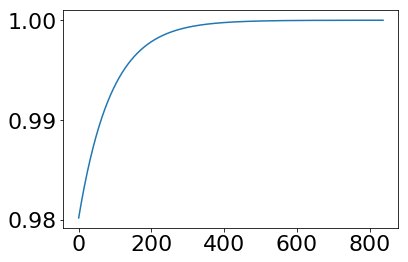

In [273]:
# beta
beta = [[1-alpha*np.exp(-np.linspace(1, t_one[T], t_one[T])/tau[T][l]) for l in range(len(lamb))] for T in range(4)]
plt.plot(beta[3][0])
plt.show()

In [275]:
# beta times transit signal
tra_beta = [[beta[T][l]*tra_norm[T][l] for l in range(len(lamb))] for T in range(4)]

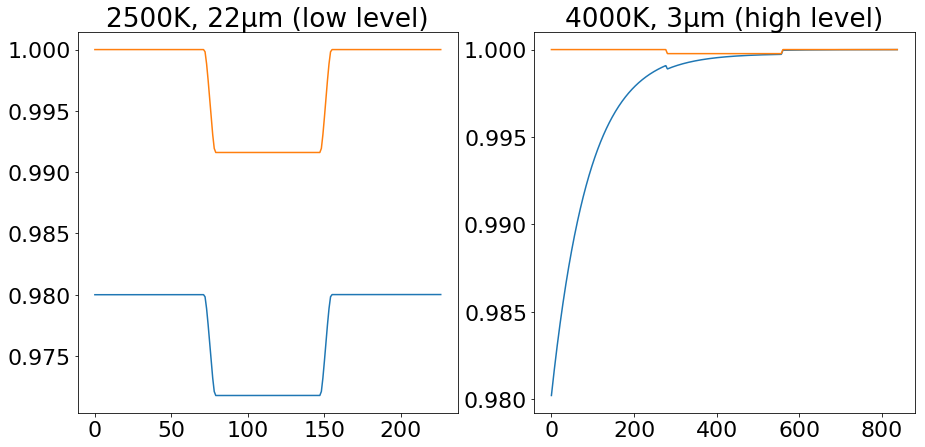

In [276]:
# check
plt.figure(figsize=(15,7))
plt.subplot(121)
plt.plot(tra_beta[0][-1])
plt.plot(tra_norm[0][-1])
plt.title('2500K, 22µm (low level)')
plt.subplot(122)
plt.plot(tra_beta[3][0])
plt.plot(tra_norm[3][0])
plt.title('4000K, 3µm (high level)')
plt.show()

In [278]:
# evaluation
top = [[np.mean([tra_beta[T][l][k] for k in range(t_one[T]) if z[T][k]>1+p[T]]) for l in range(len(lamb))] for T in range(4)]
bottom = [[np.mean([tra_beta[T][l][k] for k in range(t_one[T]) if z[T][k]<1-p[T]]) for l in range(len(lamb))] for T in range(4)]
eva = [[np.abs(tra_norm[T][l][int(t_one[T]/2)]-bottom[T][l]/top[T][l])*10**6 for l in range(len(lamb))] for T in range(4)]

In [325]:
# extract order of target wavelength
def lamb_tar(l_tar):
    return np.where(np.abs(lamb-l_tar)==np.abs(lamb-l_tar).min())[0][0]

l_all = [lamb_tar(3), lamb_tar(22)]
l_CH4 = [lamb_tar(3.2), lamb_tar(3.5), lamb_tar(3.3)]
l_O3 = [lamb_tar(9), lamb_tar(10), lamb_tar(10)]
l_CO2 = [lamb_tar(13), lamb_tar(17), lamb_tar(15)]

In [327]:
# τ1
tau_3 = [int(tau[T][l_all[0]]/60) for T in range(4)]
tau_10 = [int(tau[T][l_O3[2]]/60) for T in range(4)]
tau_15 = [int(tau[T][l_CO2[2]]/60) for T in range(4)]
tau_22 = [int(tau[T][l_all[1]]/60) for T in range(4)]
df_tau = pd.DataFrame({3: tau_3, 10: tau_10, 15: tau_15, 22: tau_22},
                      index=['2500K', '3000K', '3500K', '4000K'])
df_tau

,3,10,15,22
2500K,135,1185,1854,5307
3000K,37,379,605,1751
3500K,4,51,83,244
4000K,1,18,29,86


In [324]:
# relative spectral-photometric accuracy
def residual(T, l_tar):
    return np.abs(eva[T][l_tar[0]]-eva[T][l_tar[1]])

res_all = [residual(T, l_all) for T in range(4)]
res_CH4 = [residual(T, l_CH4) for T in range(4)]
res_O3 = [residual(T, l_O3) for T in range(4)]
res_CO2 = [residual(T, l_CO2) for T in range(4)]
df_res = pd.DataFrame({'ALL': res_all, 'CH4': res_CH4, 'O3': res_O3, 'CO2': res_CO2},
                      index=['2500K', '3000K', '3500K', '4000K'])
df_res

,ALL,CH4,CO2,O3
2500K,0.905809,0.220621,0.008341,0.009285
3000K,9.342129,2.398577,0.064224,0.074940
3500K,1464.911243,315.014133,16.248335,18.632313
4000K,2798.050828,209.617957,295.229530,276.110414


In [154]:
std = 100
times = 1
def gain_fluctuation(TT):
    period = np.linspace(60*2, t_one[TT]*60*4, 10000)
    frequency = 1/period
    for tt in range(times):
        fluctuation = np.sum([Fluctuation(f, t0[TT]*60) for f in frequency], axis=0)
        gain_one = 1+fluctuation
        gain_one = gain_one*(std*10**(-6)/gain_one.std())
        if tt==0:
            gain = gain_one
        else:
            gain = np.hstack((gain, gain_one))
    return gain

def Fluctuation(f, t):
    return np.sin(2*np.pi*(f*t+rd.random()))/np.sqrt(f)

gain = gain_fluctuation(0)

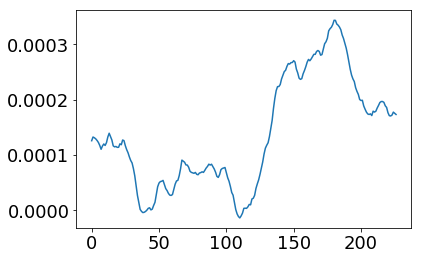

In [155]:
plt.plot(gain)
plt.show()